### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

### LOADING THE DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/DATA/StudentsPerformance.csv")
df.head()

Mounted at /content/drive


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### BASIC DATA EXPLORATION

In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

Shape of dataset: (1000, 8)

Column Names: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Data Types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Summary Statistics:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### OUTLIER TREATMENT

In [4]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

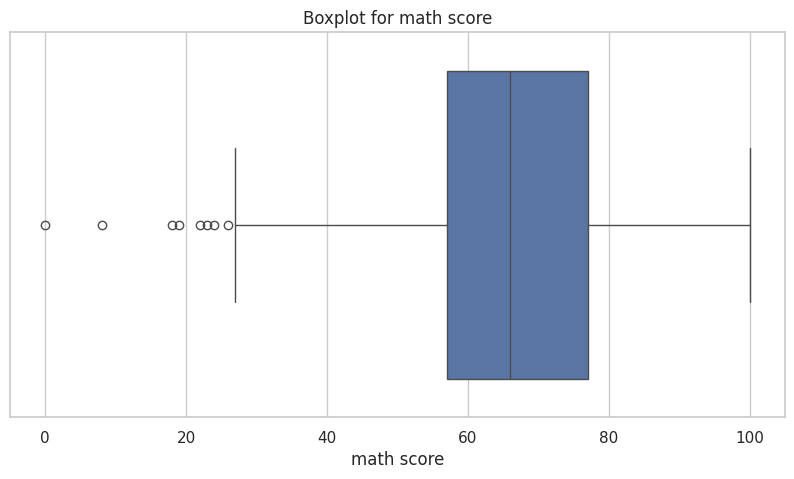

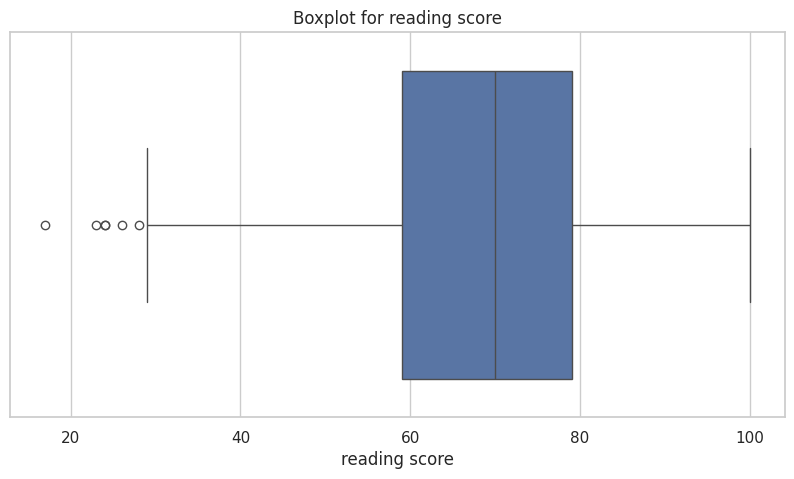

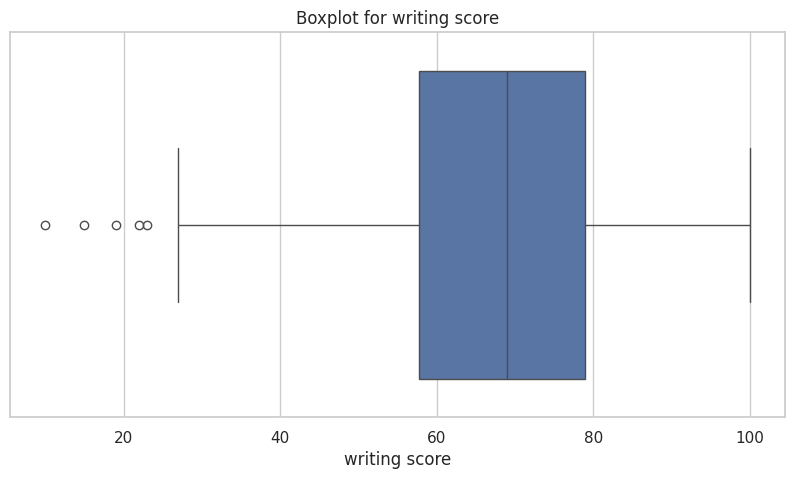

In [5]:
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [6]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))

### CHECK FOR MISSING VALUES

In [7]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


REPLACE NULL VALUES USING MEAN, MEDIAN, MODE

In [8]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-3154000584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled successfully.")

Missing values handled successfully.


/tmp/ipython-input-420698690.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### NORMALIZATION & SCALING

In [10]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Numerical columns scaled successfully.")

Numerical columns scaled successfully.


### ENCODE CATEGORICAL VARIABLES

In [11]:
df = pd.get_dummies(df, drop_first=True)
print("Categorical variables encoded successfully.")

Categorical variables encoded successfully.


### UNIVARIATE ANALYSIS

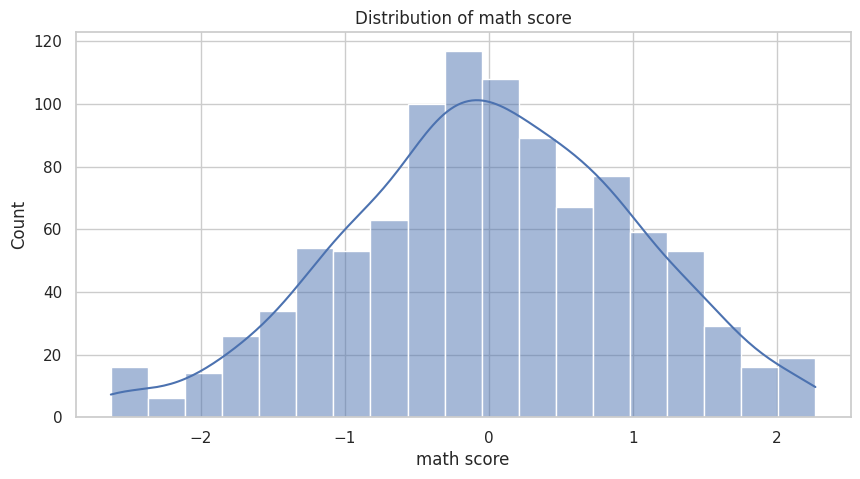

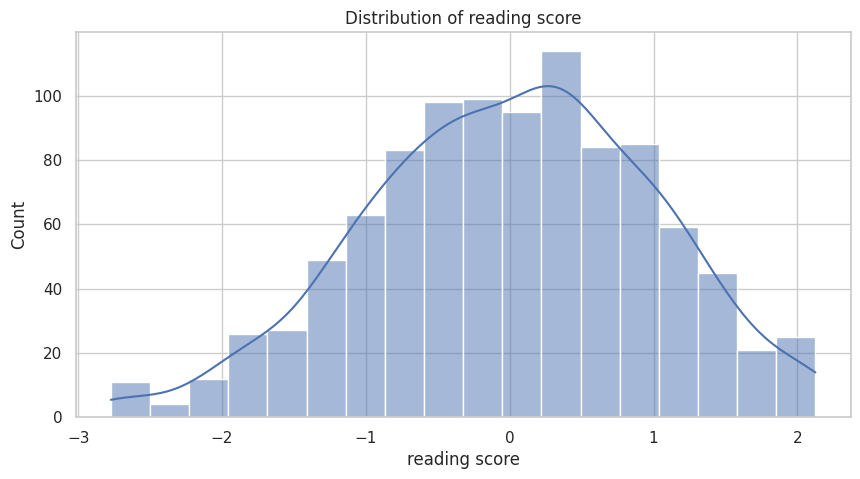

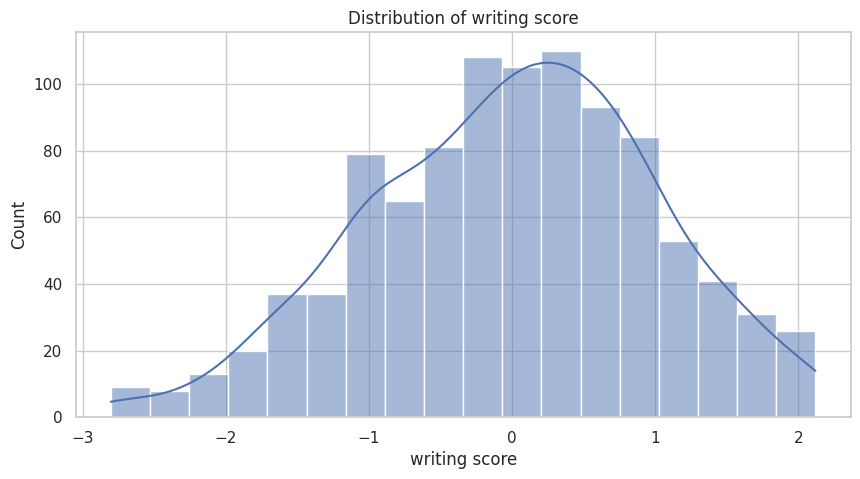

In [12]:
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

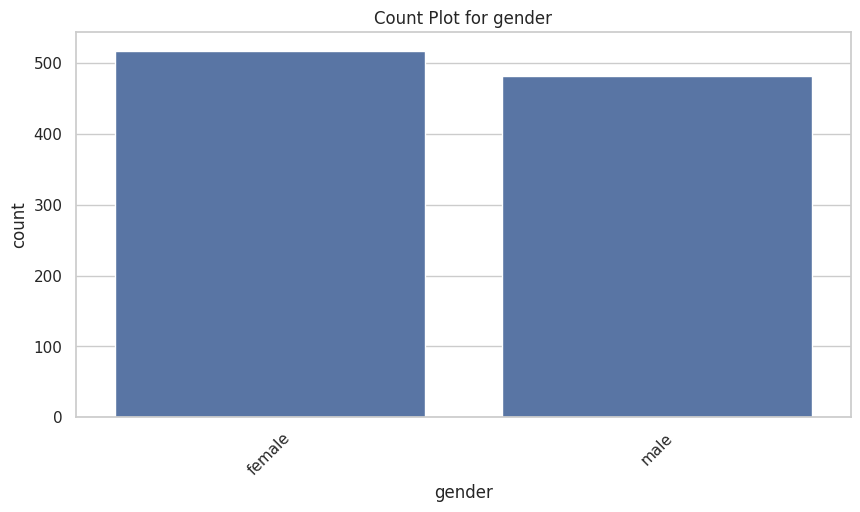

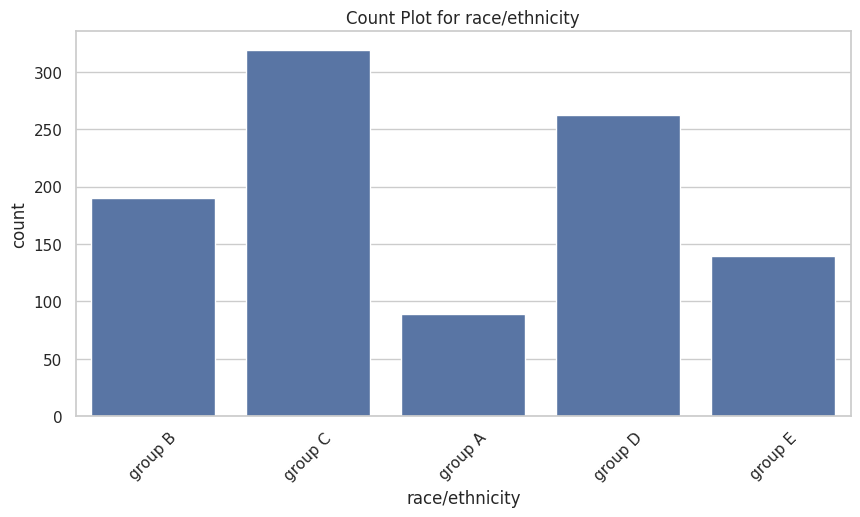

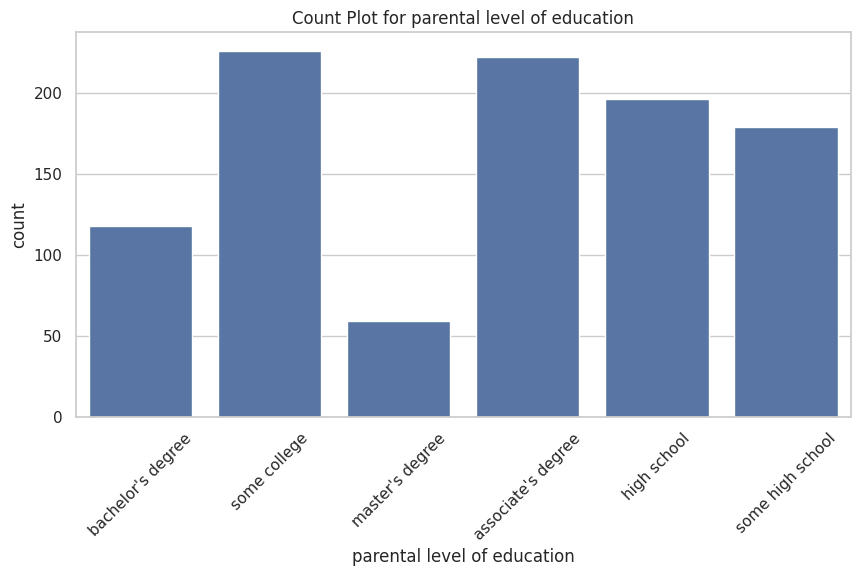

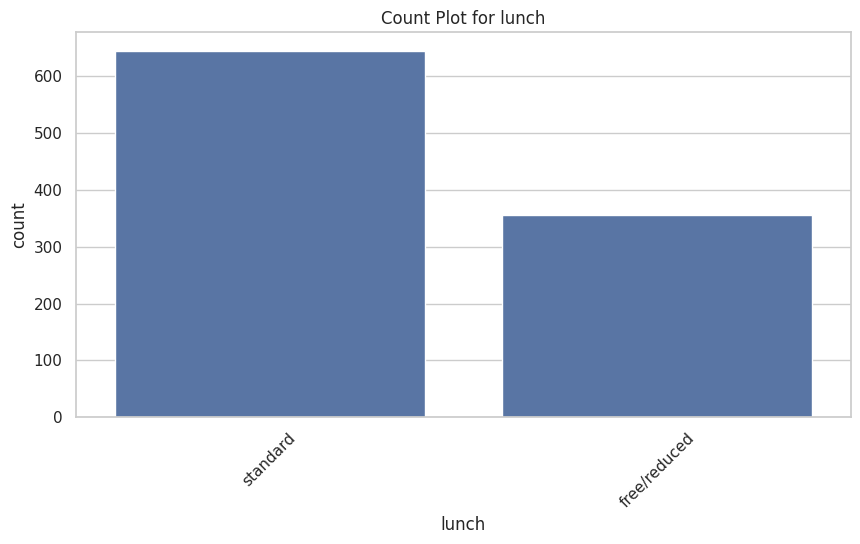

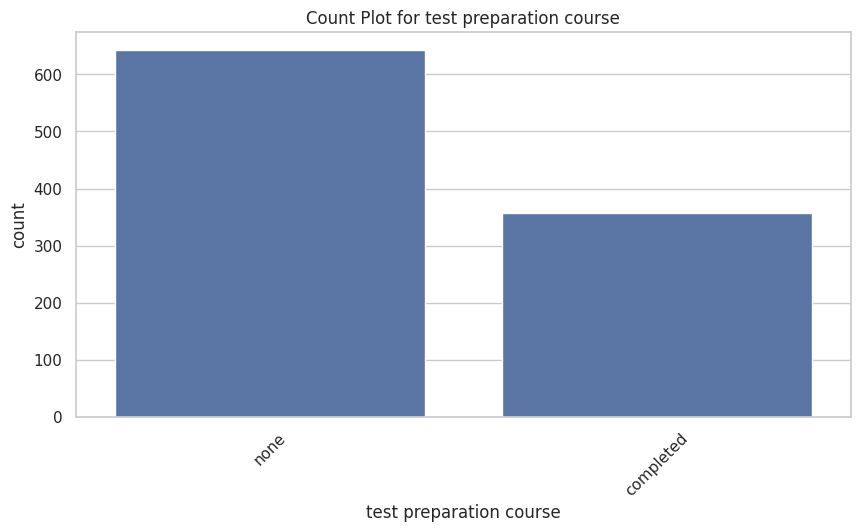

In [13]:
df_original = pd.read_csv("/content/drive/MyDrive/DATA/StudentsPerformance.csv")
for col in df_original.select_dtypes(include=['object']).columns:
    sns.countplot(x=df_original[col])
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

### BIVARIATE ANALYSIS

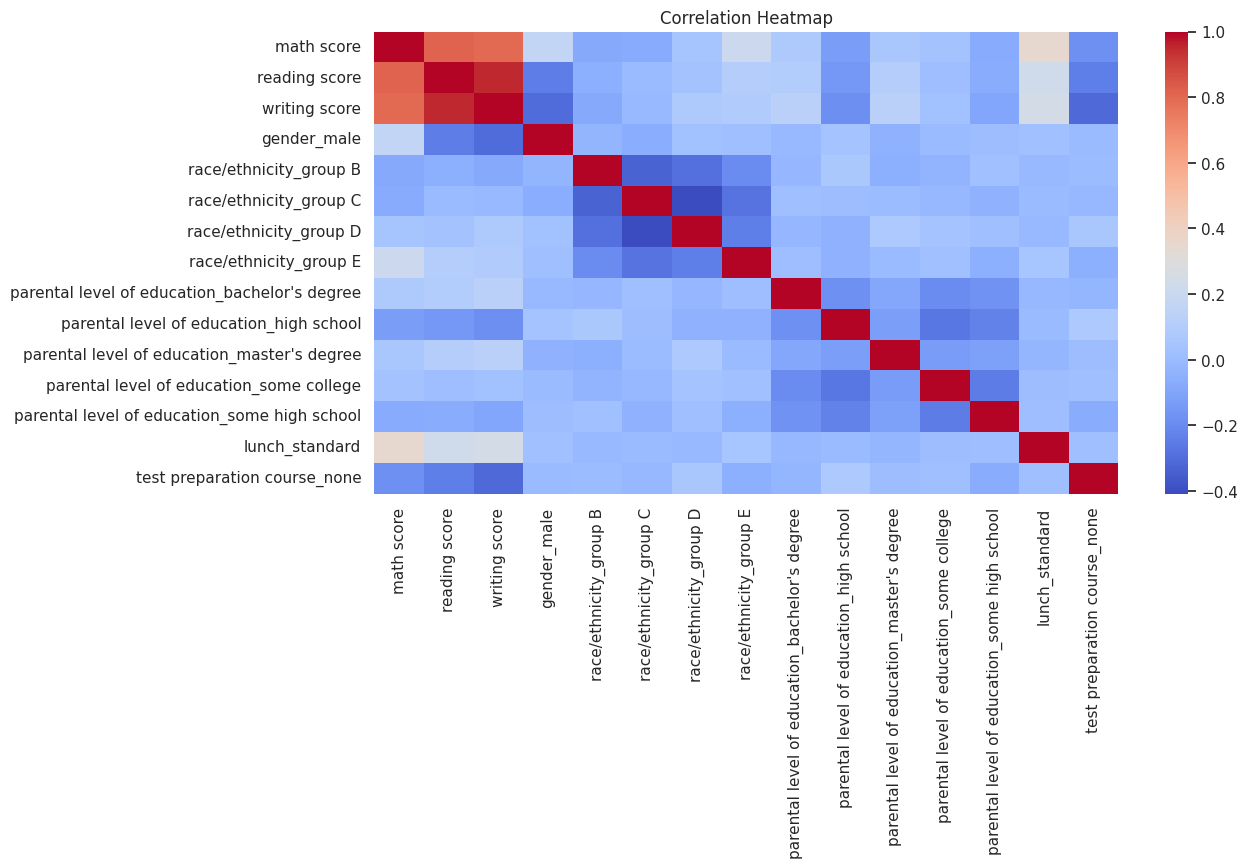

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

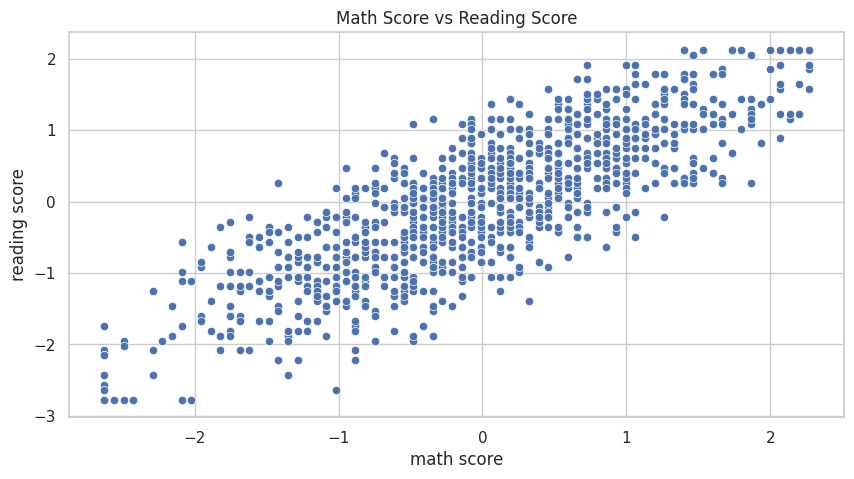

In [15]:
if 'math score' in df.columns and 'reading score' in df.columns:
    sns.scatterplot(x=df['math score'], y=df['reading score'])
    plt.title("Math Score vs Reading Score")
    plt.show()
else:
    print("Columns 'math score' or 'reading score' not found in the dataframe.")